In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
n=60
t=np.arange(n)
beta0=100
beta1=2
A=20
P=12
sigma=5

trend = beta0 + beta1*t
seasonality = A*np.sin(2*np.pi*t/P)
noise =np.random.normal(0,sigma,n)

sales = trend+seasonality+noise

dates = pd.date_range(start='2020-01-01', periods=n, freq='M')
df = pd.DataFrame({'Date': dates, 'Sales': sales,'Trend':trend,'Seasonality':seasonality,'Noise':noise})

/tmp/ipython-input-2344579762.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=n, freq='M')


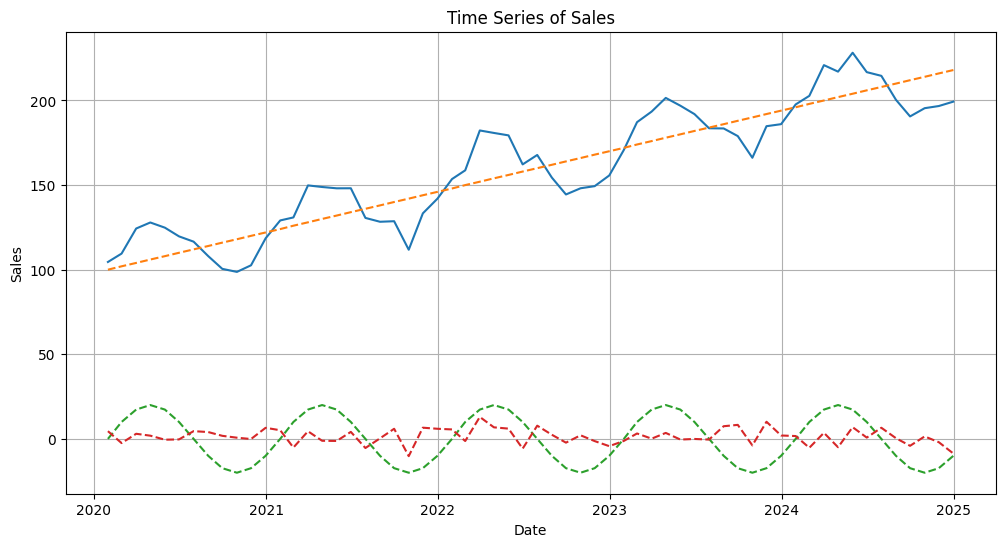

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df)
sns.lineplot(x='Date', y='Trend', data=df, linestyle='--')
sns.lineplot(x='Date', y='Seasonality', data=df, linestyle='--')
sns.lineplot(x='Date', y='Noise', data=df, linestyle='--')
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

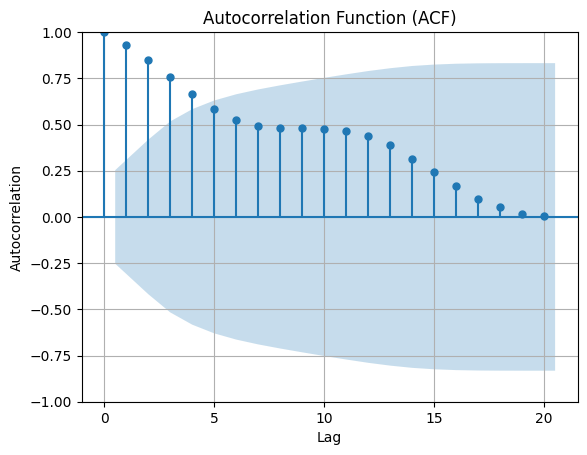

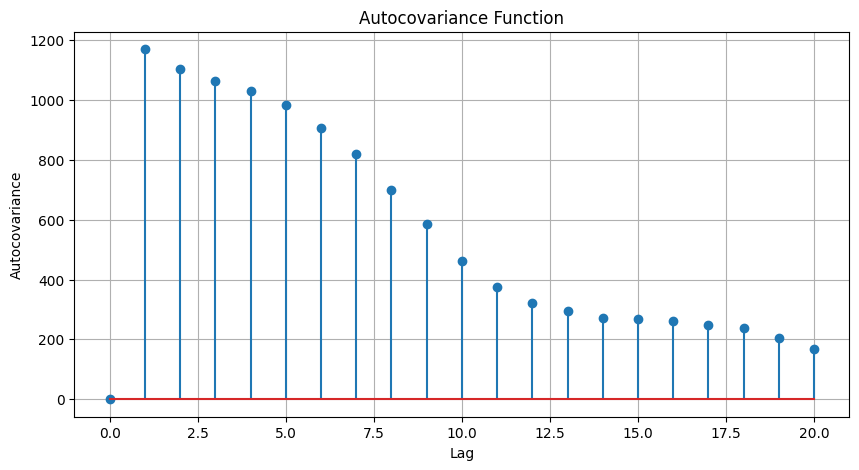

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate and plot ACF
acf_values = acf(df['Sales'])
plt.figure(figsize=(10, 5))
plot_acf(df['Sales'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Calculate and plot autocovariance for multiple lags
def autocovariance(ts, lag):
    mean = ts.mean()
    cov = np.sum((ts[:-lag] - mean) * (ts[lag:] - mean)) / len(ts)
    return cov

autocovariance_values_multi_lag = [autocovariance(df['Sales'], lag) for lag in range(21)]

plt.figure(figsize=(10, 5))
plt.stem(range(21), autocovariance_values_multi_lag)
plt.title('Autocovariance Function')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df['Sales'])

# Extract and print the results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis).")
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -0.9553443959491951
p-value: 0.7692011665604044
Critical Values:
   1%: -3.5714715250448363
   5%: -2.922629480573571
   10%: -2.5993358475635153
The time series is likely non-stationary (fail to reject the null hypothesis).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test initial
print(f'Initial ADF Statistic: {adf_statistic}')
print(f'Initial p-value: {p_value}')
print('Initial Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis).")
    differencing_order = 0
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis).")

    # 🔹 Première différenciation
    df['Sales_diff1'] = df['Sales'].diff()

    # Retire les valeurs manquantes avant le test
    adf_test_diff1 = adfuller(df['Sales_diff1'].dropna())
    adf_statistic_diff1 = adf_test_diff1[0]
    p_value_diff1 = adf_test_diff1[1]
    critical_values_diff1 = adf_test_diff1[4]

    print(f'\nADF Statistic after first differencing: {adf_statistic_diff1}')
    print(f'p-value after first differencing: {p_value_diff1}')
    print('Critical Values after first differencing:')
    for key, value in critical_values_diff1.items():
        print(f'   {key}: {value}')

    if p_value_diff1 <= 0.05:
        print("The first-differenced time series is likely stationary.")
        differencing_order = 1
    else:
        print("The first-differenced time series is still non-stationary.")

        # 🔹 Deuxième différenciation
        df['Sales_diff2'] = df['Sales_diff1'].diff()

        # Retirer les valeurs manquantes avant le test
        adf_test_diff2 = adfuller(df['Sales_diff2'].dropna())
        adf_statistic_diff2 = adf_test_diff2[0]
        p_value_diff2 = adf_test_diff2[1]
        critical_values_diff2 = adf_test_diff2[4]

        print(f'\nADF Statistic after second differencing: {adf_statistic_diff2}')
        print(f'p-value after second differencing: {p_value_diff2}')
        print('Critical Values after second differencing:')
        for key, value in critical_values_diff2.items():
            print(f'   {key}: {value}')

        if p_value_diff2 <= 0.05:
            print("The second-differenced time series is likely stationary.")
            differencing_order = 2
        else:
            print("The second-differenced time series is still non-stationary. Further differencing may be needed.")
            differencing_order = None

print(f'\nDetermined differencing order (d): {differencing_order}')


Initial ADF Statistic: -0.9553443959491951
Initial p-value: 0.7692011665604044
Initial Critical Values:
   1%: -3.5714715250448363
   5%: -2.922629480573571
   10%: -2.5993358475635153
The time series is likely non-stationary (fail to reject the null hypothesis).

ADF Statistic after first differencing: -6.386199057894945
p-value after first differencing: 2.1612168825721363e-08
Critical Values after first differencing:
   1%: -3.5714715250448363
   5%: -2.922629480573571
   10%: -2.5993358475635153
The first-differenced time series is likely stationary.

Determined differencing order (d): 1


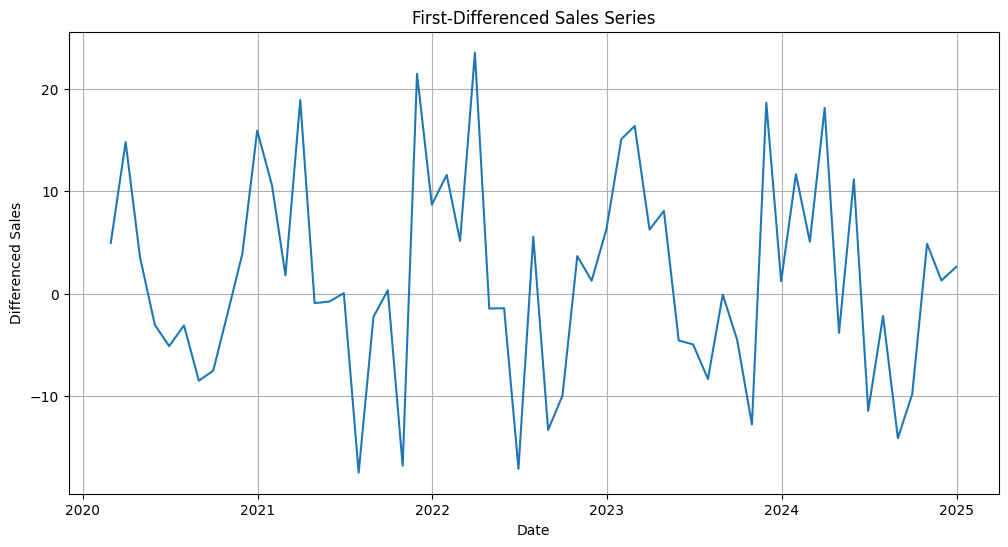

In [ ]:
# Plot the first-differenced series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales_diff1', data=df.dropna(subset=['Sales_diff1']))
plt.title('First-Differenced Sales Series')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/tmp/ipython-input-2631829562.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assig

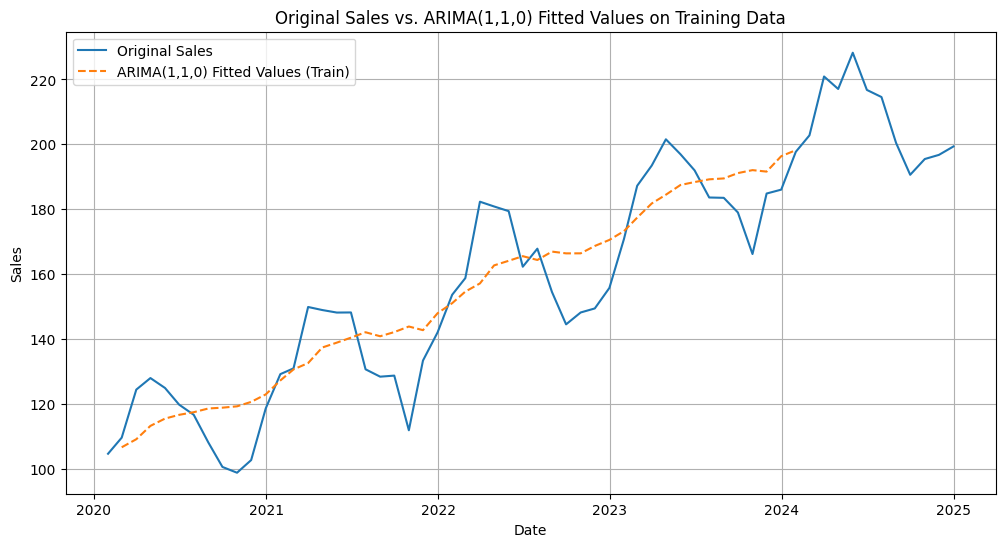

ARIMA(1,1,0) Model Summary (Fitted on Training Data):
                               SARIMAX Results                                
Dep. Variable:            Sales_diff1   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -178.461
Date:                Mon, 27 Oct 2025   AIC                            362.921
Time:                        16:48:26   BIC                            368.535
Sample:                             0   HQIC                           365.042
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9926      1.826      1.091      0.275      -1.587       5.572
ar.L1          0.1654      0.166      0.997      0.319      -0.160       0.49

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df['Sales_diff1'].dropna().iloc[:train_size], df['Sales_diff1'].dropna().iloc[train_size:]

# Fit an AR(1) model to the training data (differenced series)
ar1_diff_model = ARIMA(train_data, order=(1, 0, 0))
ar1_diff_results = ar1_diff_model.fit()

# Get the fitted values for the differenced training series
fitted_diff_train_values = ar1_diff_results.fittedvalues

# To compare with the original series, we need to "undifference" the fitted training values
# We'll add the first value of the original sales (from the training set) to the cumulative sum of the fitted differenced values
# Need to be careful with indexing here
original_sales_train = df['Sales'].iloc[:len(train_data) + 1] # Include the first value for undifferencing
ar1_diff_fitted_original_train = original_sales_train.iloc[0] + fitted_diff_train_values.cumsum()

# Create a new column in the original dataframe for plotting
df['ARIMA_1_1_0_Fitted_Train'] = np.nan
df['ARIMA_1_1_0_Fitted_Train'].iloc[1:len(ar1_diff_fitted_original_train) + 1] = ar1_diff_fitted_original_train.values


# Plot the original series and the AR(1) on differenced data fitted values on the training set
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df, label='Original Sales')
sns.lineplot(x='Date', y='ARIMA_1_1_0_Fitted_Train', data=df, label='ARIMA(1,1,0) Fitted Values (Train)', linestyle='--')
plt.title('Original Sales vs. ARIMA(1,1,0) Fitted Values on Training Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(1,1,0) Model Summary (Fitted on Training Data):")
print(ar1_diff_results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/tmp/ipython-input-3087212684.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assig

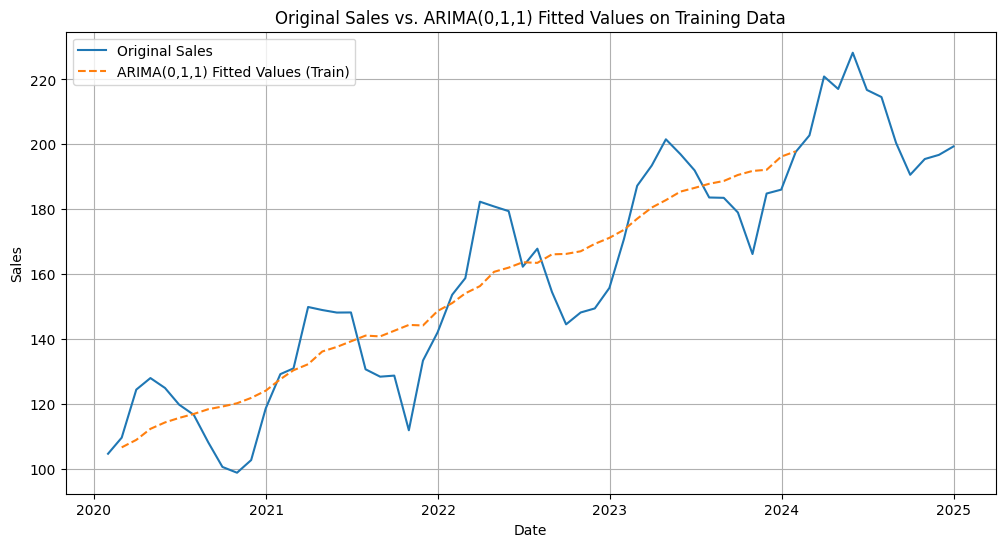

ARIMA(0,1,1) Model Summary (Fitted on Training Data):
                               SARIMAX Results                                
Dep. Variable:            Sales_diff1   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -178.670
Date:                Mon, 27 Oct 2025   AIC                            363.339
Time:                        16:41:40   BIC                            368.953
Sample:                             0   HQIC                           365.461
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9677      1.690      1.164      0.244      -1.345       5.280
ma.L1          0.1145      0.175      0.653      0.514      -0.229       0.45

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df['Sales_diff1'].dropna().iloc[:train_size], df['Sales_diff1'].dropna().iloc[train_size:]


# Fit an MA(1) model to the training data (differenced series)
# The order is (p, d, q) - for MA(1) on differenced data, it's (0, 0, 1)
# This is equivalent to ARIMA(0, 1, 1) on the original data
ma1_diff_model = ARIMA(train_data, order=(0, 0, 1))
ma1_diff_results = ma1_diff_model.fit()

# Get the fitted values for the differenced training series
fitted_diff_train_values_ma1 = ma1_diff_results.fittedvalues

# To compare with the original series, we need to "undifference" the fitted training values
# We'll add the first value of the original sales (from the training set) to the cumulative sum of the fitted differenced values
# Need to be careful with indexing here
original_sales_train = df['Sales'].iloc[:len(train_data) + 1] # Include the first value for undifferencing
ma1_diff_fitted_original_train = original_sales_train.iloc[0] + fitted_diff_train_values_ma1.cumsum()

# Create a new column in the original dataframe for plotting
df['ARIMA_0_1_1_Fitted_Train'] = np.nan
df['ARIMA_0_1_1_Fitted_Train'].iloc[1:len(ma1_diff_fitted_original_train) + 1] = ma1_diff_fitted_original_train.values


# Plot the original series and the MA(1) on differenced data fitted values on the training set
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df, label='Original Sales')
sns.lineplot(x='Date', y='ARIMA_0_1_1_Fitted_Train', data=df, label='ARIMA(0,1,1) Fitted Values (Train)', linestyle='--')
plt.title('Original Sales vs. ARIMA(0,1,1) Fitted Values on Training Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(0,1,1) Model Summary (Fitted on Training Data):")
print(ma1_diff_results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/tmp/ipython-input-3957835434.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assig

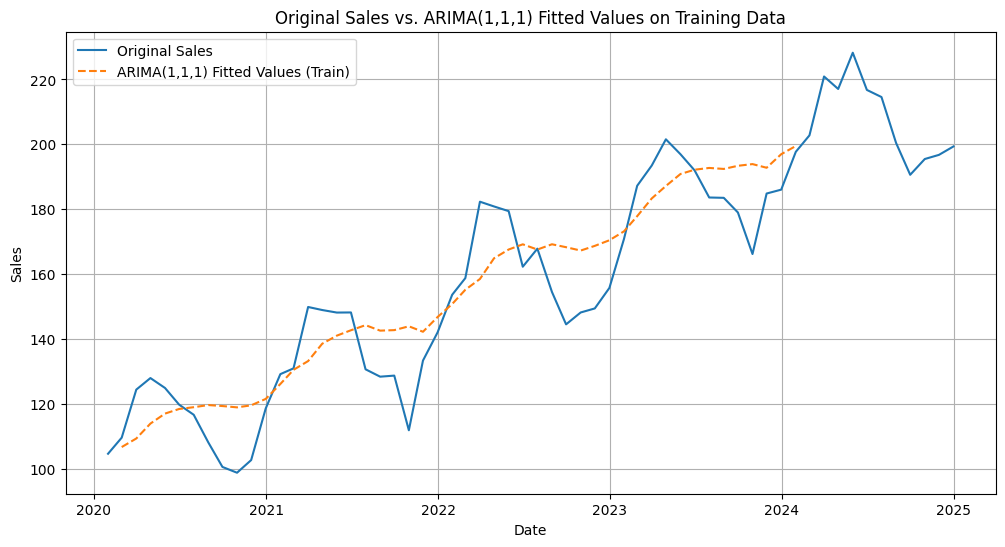

ARIMA(1,1,1) Model Summary (Fitted on Training Data):
                               SARIMAX Results                                
Dep. Variable:            Sales_diff1   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -178.670
Date:                Mon, 27 Oct 2025   AIC                            363.339
Time:                        17:10:02   BIC                            368.953
Sample:                             0   HQIC                           365.461
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9677      1.690      1.164      0.244      -1.345       5.280
ma.L1          0.1145      0.175      0.653      0.514      -0.229       0.45

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


arima1_diff_model = ARIMA(train_data, order=(1, 0, 1))
arima1_diff_results = arima1_diff_model.fit()

# Get the fitted values for the differenced training series
fitted_diff_train_values_ma1 = arima1_diff_results.fittedvalues

# To compare with the original series, we need to "undifference" the fitted training values
# We'll add the first value of the original sales (from the training set) to the cumulative sum of the fitted differenced values
# Need to be careful with indexing here
original_sales_train = df['Sales'].iloc[:len(train_data) + 1] # Include the first value for undifferencing
ma1_diff_fitted_original_train = original_sales_train.iloc[0] + fitted_diff_train_values_ma1.cumsum()

# Create a new column in the original dataframe for plotting
df['ARIMA_1_1_1_Fitted_Train'] = np.nan
df['ARIMA_1_1_1_Fitted_Train'].iloc[1:len(ma1_diff_fitted_original_train) + 1] = ma1_diff_fitted_original_train.values


# Plot the original series and the MA(1) on differenced data fitted values on the training set
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df, label='Original Sales')
sns.lineplot(x='Date', y='ARIMA_1_1_1_Fitted_Train', data=df, label='ARIMA(1,1,1) Fitted Values (Train)', linestyle='--')
plt.title('Original Sales vs. ARIMA(1,1,1) Fitted Values on Training Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(1,1,1) Model Summary (Fitted on Training Data):")
print(ma1_diff_results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

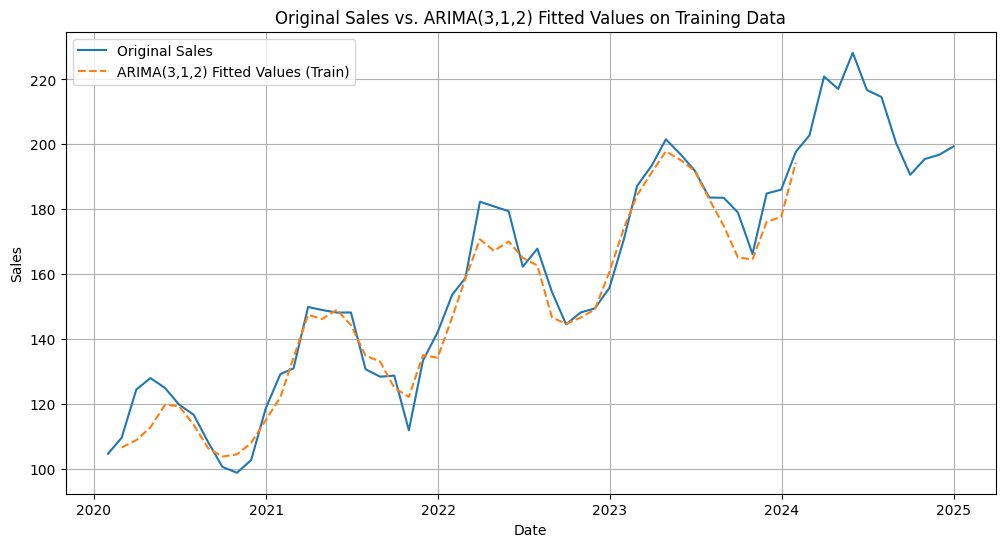

ARIMA(1,1,1) Model Summary (Fitted on Training Data):
                               SARIMAX Results                                
Dep. Variable:            Sales_diff1   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -178.670
Date:                Mon, 27 Oct 2025   AIC                            363.339
Time:                        17:11:35   BIC                            368.953
Sample:                             0   HQIC                           365.461
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9677      1.690      1.164      0.244      -1.345       5.280
ma.L1          0.1145      0.175      0.653      0.514      -0.229       0.45

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


arima2_diff_model = ARIMA(train_data, order=(3, 0, 2))
arima2_diff_results = arima2_diff_model.fit()

# Get the fitted values for the differenced training series
fitted_diff_train_values_ma1 = arima2_diff_results.fittedvalues

# To compare with the original series, we need to "undifference" the fitted training values
# We'll add the first value of the original sales (from the training set) to the cumulative sum of the fitted differenced values
# Need to be careful with indexing here
original_sales_train = df['Sales'].iloc[:len(train_data) + 1] # Include the first value for undifferencing
ma1_diff_fitted_original_train = original_sales_train.iloc[0] + fitted_diff_train_values_ma1.cumsum()

# Create a new column in the original dataframe for plotting
df['ARIMA_3_1_2_Fitted_Train'] = np.nan
df['ARIMA_3_1_2_Fitted_Train'].iloc[1:len(ma1_diff_fitted_original_train) + 1] = ma1_diff_fitted_original_train.values


# Plot the original series and the MA(1) on differenced data fitted values on the training set
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df, label='Original Sales')
sns.lineplot(x='Date', y='ARIMA_3_1_2_Fitted_Train', data=df, label='ARIMA(3,1,2) Fitted Values (Train)', linestyle='--')
plt.title('Original Sales vs. ARIMA(3,1,2) Fitted Values on Training Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ARIMA(1,1,1) Model Summary (Fitted on Training Data):")
print(ma1_diff_results.summary())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the SARIMA model parameters
# Non-seasonal order (p, d, q)
# Seasonal order (P, D, Q, s) where s is the seasonal period (e.g., 12 for monthly data)
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 0, 0, 12)

# Split the data into training and testing sets (using the same split as before)
train_size = int(len(df) * 0.8)
train_data_original = df['Sales'].iloc[:train_size] # Use original data for SARIMA

# Fit the SARIMA model to the training data
sarima_model = ARIMA(train_data_original, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_results = sarima_model.fit()

print("SARIMA Model Summary (Fitted on Training Data):")
print(sarima_results.summary())

SARIMA Model Summary (Fitted on Training Data):
                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   48
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -172.056
Date:                           Mon, 27 Oct 2025   AIC                            352.112
Time:                                   17:19:49   BIC                            359.512
Sample:                                        0   HQIC                           354.896
                                            - 48                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6341      0.312      2.036      0.042       0.024       1

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


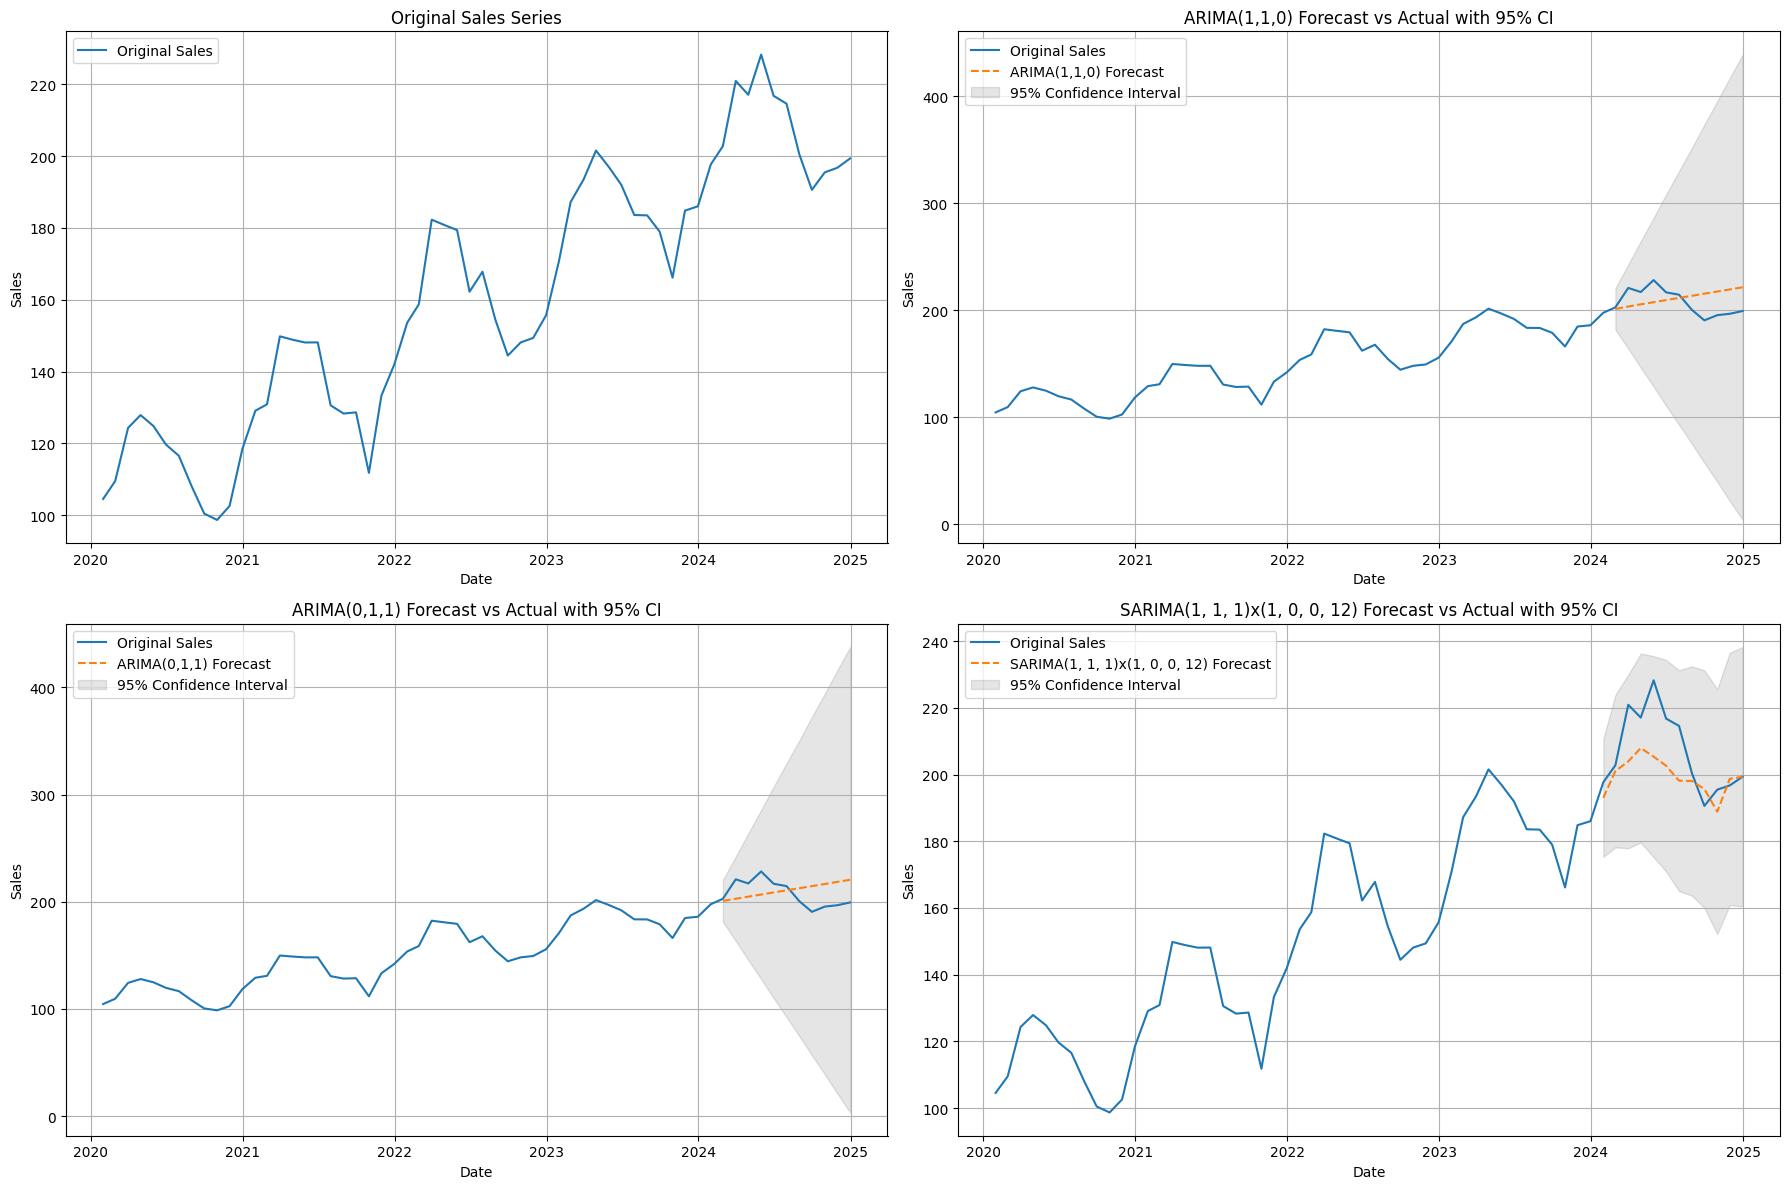

In [ ]:
# Get forecasts and confidence intervals for ARIMA(1,1,0) on the test set
arima110_results_pred = ar1_diff_results.get_prediction(start=len(train_data), end=len(df['Sales_diff1'].dropna()) - 1)
arima110_forecast = arima110_results_pred.predicted_mean
arima110_conf_int = arima110_results_pred.conf_int(alpha=0.05) # 95% confidence interval

# Undifference the forecasts and confidence intervals
arima110_forecast_original = df['Sales'].iloc[len(train_data)] + arima110_forecast.cumsum()
# Undifferencing confidence intervals is a bit more complex, a simple approach is to add the first value of the original sales to the cumsum of the lower/upper bounds of the differenced confidence intervals.
arima110_conf_int_original = df['Sales'].iloc[len(train_data)] + arima110_conf_int.cumsum()


# Get forecasts and confidence intervals for ARIMA(0,1,1) on the test set
arima011_results_pred = ma1_diff_results.get_prediction(start=len(train_data), end=len(df['Sales_diff1'].dropna()) - 1)
arima011_forecast = arima011_results_pred.predicted_mean
arima011_conf_int = arima011_results_pred.conf_int(alpha=0.05)

# Undifference the forecasts and confidence intervals
arima011_forecast_original = df['Sales'].iloc[len(train_data)] + arima011_forecast.cumsum()
arima011_conf_int_original = df['Sales'].iloc[len(train_data)] + arima011_conf_int.cumsum()


# Get forecasts and confidence intervals for SARIMA on the test set
sarima_results_pred = sarima_results.get_prediction(start=train_size, end=len(df) - 1)
sarima_forecast = sarima_results_pred.predicted_mean
sarima_conf_int = sarima_results_pred.conf_int(alpha=0.05)


# Create the 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Original Sales
sns.lineplot(x='Date', y='Sales', data=df, ax=axes[0, 0], label='Original Sales')
axes[0, 0].set_title('Original Sales Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].grid(True)

# Plot 2: ARIMA(1,1,0) Forecast vs Actual with Confidence Intervals
sns.lineplot(x='Date', y='Sales', data=df, ax=axes[0, 1], label='Original Sales')
sns.lineplot(x=df['Date'].iloc[len(train_data)+1:len(train_data)+len(arima110_forecast_original)+1], y=arima110_forecast_original.values, ax=axes[0, 1], label='ARIMA(1,1,0) Forecast', linestyle='--')
axes[0, 1].fill_between(df['Date'].iloc[len(train_data)+1:len(train_data)+len(arima110_forecast_original)+1],
                         arima110_conf_int_original.iloc[:, 0].values,
                         arima110_conf_int_original.iloc[:, 1].values, color='k', alpha=.1, label='95% Confidence Interval')
axes[0, 1].set_title('ARIMA(1,1,0) Forecast vs Actual with 95% CI')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: ARIMA(0,1,1) Forecast vs Actual with Confidence Intervals
sns.lineplot(x='Date', y='Sales', data=df, ax=axes[1, 0], label='Original Sales')
sns.lineplot(x=df['Date'].iloc[len(train_data)+1:len(train_data)+len(arima011_forecast_original)+1], y=arima011_forecast_original.values, ax=axes[1, 0], label='ARIMA(0,1,1) Forecast', linestyle='--')
axes[1, 0].fill_between(df['Date'].iloc[len(train_data)+1:len(train_data)+len(arima011_forecast_original)+1],
                         arima011_conf_int_original.iloc[:, 0].values,
                         arima011_conf_int_original.iloc[:, 1].values, color='k', alpha=.1, label='95% Confidence Interval')
axes[1, 0].set_title('ARIMA(0,1,1) Forecast vs Actual with 95% CI')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: SARIMA Forecast vs Actual with Confidence Intervals
sns.lineplot(x='Date', y='Sales', data=df, ax=axes[1, 1], label='Original Sales')
sns.lineplot(x=df['Date'].iloc[train_size:len(df)], y=sarima_forecast.values, ax=axes[1, 1], label=f'SARIMA{sarima_order}x{sarima_seasonal_order[0], sarima_seasonal_order[1], sarima_seasonal_order[2], sarima_seasonal_order[3]} Forecast', linestyle='--')
axes[1, 1].fill_between(df['Date'].iloc[train_size:len(df)],
                         sarima_conf_int.iloc[:, 0].values,
                         sarima_conf_int.iloc[:, 1].values, color='k', alpha=.1, label='95% Confidence Interval')
axes[1, 1].set_title(f'SARIMA{sarima_order}x{sarima_seasonal_order[0], sarima_seasonal_order[1], sarima_seasonal_order[2], sarima_seasonal_order[3]} Forecast vs Actual with 95% CI')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()